In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline
os.chdir('C:\\Users\\Gebruiker\\Desktop\Rotzooi begint hier\\uvt\\Brainihacks\\emotunz')

In [61]:
path = 'C:\\Users\\Gebruiker\\Desktop\\Rotzooi begint hier\\uvt\\Brainihacks\\emotunz\\sadethel\\5.csv'


with open(path) as file:
    data = file.readlines()
    

eeg = data[0].replace('\'', '')
eeg = eeg.split(',')

In [62]:
count = 0
#'FZ', 'C3', 'CZ', 'C4', 'PZ', 'F3', 'OZ', 'F4'
Fz = []
C3 = []
Cz = []
C4 = []
Pz = []
F3 = []
POz = []
F4 = []

for i in range(len(eeg)):
    if count == 0:
        Fz.append(float(eeg[i]))
    elif count == 1:
        C3.append(float(eeg[i]))
    elif count == 2:
        Cz.append(float(eeg[i]))
    elif count ==3:
        C4.append(float(eeg[i]))
    elif count == 4:
        Pz.append(float(eeg[i]))
    elif count == 5:
        F3.append(float(eeg[i]))
    elif count == 6:
        POz.append(float(eeg[i]))
    elif count ==7:
        F4.append(float(eeg[i]))
    count += 1
    if count == 8:
        count = 0
        

In [63]:
rawEEG = pd.DataFrame({'Fz':Fz, 'C3': C3, 'Cz': Cz, 'C4':C4, 'Pz':Pz, 'F3':F3, 'POz':POz, 'F4':F4})
rawEEG.head(5)

,Fz,C3,Cz,C4,Pz,F3,POz,F4
0,0.00000,0.00000,0.0000,0.00000,0.00000,0.000000,0.000000,0.000000
1,645396.18750,121220.21875,607936.7500,-750000.12500,435198.50000,373894.531250,262707.937500,750000.062500
2,284472.62500,301610.68750,735763.5000,-750000.12500,466367.65625,342158.468750,161793.203125,680353.062500
3,-486070.71875,557480.93750,750000.0625,-251149.21875,470216.62500,-25642.191406,251687.718750,590352.437500
4,-750000.12500,750000.06250,750000.0625,405274.06250,481722.59375,205055.718750,437078.625000,214812.515625


In [64]:
from sklearn import preprocessing

def scaleChannel(arr):
    
    reshaped_arr = arr.reshape(-1, 1)
    #scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler()
    scaler = scaler.fit(reshaped_arr)
    channel_scaled = scaler.transform(reshaped_arr)
    return channel_scaled

# Checking reconstruction
#X_rec = scaler.inverse_transform(X_scaled)

F3Channel = np.array(rawEEG['F3'][500:])
F3Scaled = scaleChannel(F3Channel)
F4Channel = np.array(rawEEG['F4'][500:])
F4Scaled = scaleChannel(F4Channel)

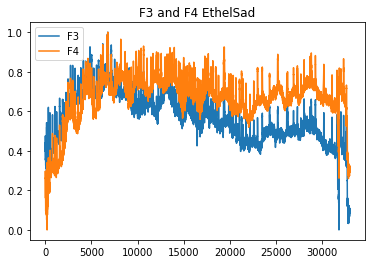

In [65]:
plt.plot(F3Scaled, label = 'F3')
plt.plot(F4Scaled, label = 'F4')
plt.title('F3 and F4 EthelSad')
plt.legend()
plt.savefig('Asymmetry EthelSad', dpi = 300)

In [66]:
def FrontalAlphaAsymmetry(left, right):
    epochs = []
    lefthem = []
    righthem = []
    #sample freq = 250 Hz
    #8 seconds = 2000 samples per epoch
    count = 0
    for i in range(len(left)):
        
       
        lefthem.append(left[i])
        righthem.append(right[i])
        
        
        if count == 2000:
            FFTLefthem = np.fft.fft(lefthem).real
            FFTRighthem = np.fft.fft(righthem).real
            
            FFTLefthem = np.nanmean(FFTLefthem[8:12])
            #print(FFTLefthem)
            FFTRighthem = np.nanmean(FFTRighthem[8:12])
        
            FrontalAlpha = np.log10(abs(FFTRighthem) /abs(FFTLefthem))
            epochs.append(FrontalAlpha)
            count = 0
            lefthem = []
            righthem = []
        count += 1
        
        
        
    return epochs

FAA = FrontalAlphaAsymmetry(F3Scaled, F4Scaled)

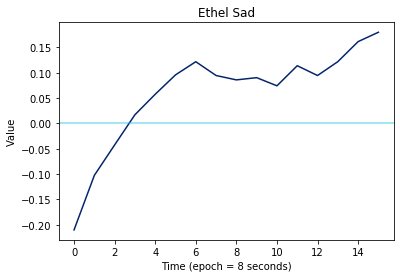

In [67]:
plt.plot(FAA, color = '#03256C')
plt.title('Ethel Sad')
plt.xlabel('Time (epoch = 8 seconds)')
plt.ylabel('Value')


plt.axhline(y = 0, color = '#06BEE1', alpha = 0.5)

plt.savefig('FAA Plot Ethel Sad', dpi=300)